In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Crime_Incidents_in_2024.csv')
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.27,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.91,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.55,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.11,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN


In [3]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [4]:
df

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.2700,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.9100,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.5500,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.6100,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.1100,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29290,400089.0400,137531.6300,24042076,2024/03/20 09:00:31+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,500 - 599 BLOCK OF M STREET NE,400089.040000,137531.630000,...,010602 4,10602.0,Precinct 83,38.905642,-76.998973,NaN,2024/03/20 07:35:00+00,2024/03/20 09:00:00+00,666776307,NaN
29291,397228.7400,137931.7900,24030573,2024/02/28 03:35:06+00,EVENING,OTHERS,THEFT F/AUTO,1400 - 1499 BLOCK OF 14TH STREET NW,397228.740000,137931.790000,...,005003 1,5003.0,Precinct 16,38.909243,-77.031952,NaN,2024/02/28 02:20:00+00,NaN,666776316,NaN
29292,403784.4300,135262.0600,24033166,2024/03/04 07:39:52+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.430000,135262.060000,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/03/04 02:07:00+00,2024/03/04 04:15:00+00,666776317,NaN
29293,396307.9600,137321.6500,24033419,2024/03/04 17:51:22+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.960000,137321.650000,...,010700 1,10700.0,Precinct 17,38.903743,-77.042565,GOLDEN TRIANGLE,2024/03/04 16:31:00+00,2024/03/04 16:35:00+00,666776318,NaN


In [5]:
df.tail()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
29290,400089.0400,137531.6300,24042076,2024/03/20 09:00:31+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,500 - 599 BLOCK OF M STREET NE,400089.04000,137531.630000,...,010602 4,10602.0,Precinct 83,38.905642,-76.998973,NaN,2024/03/20 07:35:00+00,2024/03/20 09:00:00+00,666776307,NaN
29291,397228.7400,137931.7900,24030573,2024/02/28 03:35:06+00,EVENING,OTHERS,THEFT F/AUTO,1400 - 1499 BLOCK OF 14TH STREET NW,397228.74000,137931.790000,...,005003 1,5003.0,Precinct 16,38.909243,-77.031952,NaN,2024/02/28 02:20:00+00,NaN,666776316,NaN
29292,403784.4300,135262.0600,24033166,2024/03/04 07:39:52+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.43000,135262.060000,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/03/04 02:07:00+00,2024/03/04 04:15:00+00,666776317,NaN
29293,396307.9600,137321.6500,24033419,2024/03/04 17:51:22+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.96000,137321.650000,...,010700 1,10700.0,Precinct 17,38.903743,-77.042565,GOLDEN TRIANGLE,2024/03/04 16:31:00+00,2024/03/04 16:35:00+00,666776318,NaN
29294,404893.2619,135894.6645,24033564,2024/03/04 23:35:26+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,4100 - 4199 BLOCK OF AMES STREET NE,404893.26189,135894.664508,...,009603 1,9603.0,Precinct 102,38.890882,-76.943597,NaN,2024/03/04 20:52:00+00,2024/03/04 21:54:00+00,666776319,NaN


In [6]:
df.sample()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
931,403784.43,135262.06,24069753,2024/05/10 00:53:41+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.43,135262.06,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/05/09 13:00:00+00,2024/05/09 20:30:00+00,666244796,NaN


In [7]:
df.shape

(29295, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29295 non-null  float64
 1   Y                     29295 non-null  float64
 2   CCN                   29295 non-null  int64  
 3   REPORT_DAT            29295 non-null  object 
 4   SHIFT                 29295 non-null  object 
 5   METHOD                29295 non-null  object 
 6   OFFENSE               29295 non-null  object 
 7   BLOCK                 29295 non-null  object 
 8   XBLOCK                29295 non-null  float64
 9   YBLOCK                29295 non-null  float64
 10  WARD                  29291 non-null  float64
 11  ANC                   29291 non-null  object 
 12  DISTRICT              28550 non-null  float64
 13  PSA                   28827 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29291 non-null  object 
 15  BLOCK_GROUP        

In [9]:
df.describe()

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,29295.000000,29295.000000,2.929500e+04,29295.000000,29295.000000,29291.000000,28550.000000,28827.000000,29280.000000,29295.000000,29295.000000,2.929500e+04,0.0
mean,399281.365189,137801.454601,2.412673e+07,399281.365190,137801.454601,4.393602,3.703292,374.842994,7521.588081,38.908067,-77.008292,6.666143e+08,NaN
std,3032.291061,3344.181869,1.624752e+05,3032.291061,3344.181868,2.322873,1.841980,183.751097,34736.612847,0.030124,0.034962,1.575541e+05,NaN
min,390362.150000,127300.240000,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.111162,6.662134e+08,NaN
25%,397229.000000,136234.280000,2.405873e+07,397229.000006,136234.280000,2.000000,2.000000,207.000000,3500.000000,38.893930,-77.031952,6.665412e+08,NaN
50%,399029.030000,137856.980000,2.411504e+07,399029.030000,137856.979997,5.000000,4.000000,401.000000,7202.000000,38.908569,-77.011192,6.666663e+08,NaN
75%,401206.777300,139815.115000,2.416641e+07,401206.777279,139815.115000,6.000000,5.000000,506.000000,9102.000000,38.926188,-76.986094,6.667370e+08,NaN
max,407806.750900,147365.030000,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,980000.000000,38.994217,-76.910012,6.667763e+08,NaN


In [10]:
df.isna().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
LATITUDE                    0
LONGITUDE                   0
BID                     23881
START_DATE                  6
END_DATE                 2095
OBJECTID                    0
OCTO_RECORD_ID          29295
dtype: int64

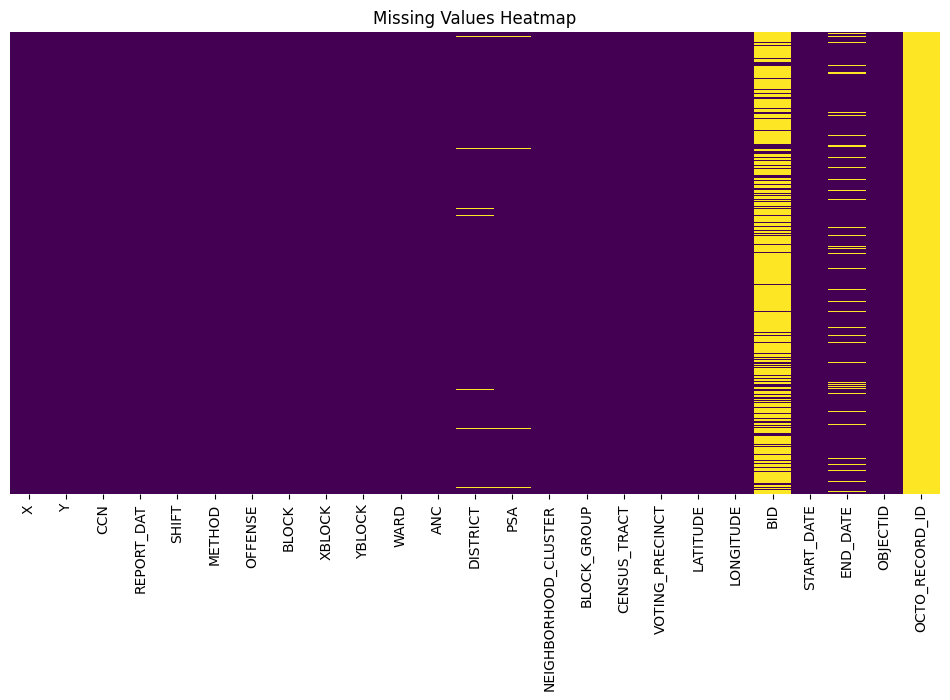

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

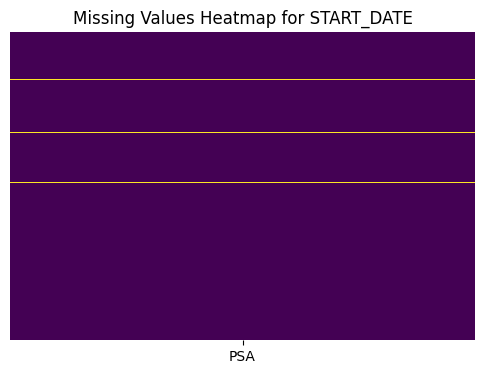

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['PSA']].isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap for START_DATE")
plt.show()

In [13]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## Data Cleaning

**Missing Values**

In [14]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
BID                     23881
START_DATE                  6
END_DATE                 2095
OCTO_RECORD_ID          29295
dtype: int64


In [17]:
df = df.drop(columns=["OCTO_RECORD_ID", "BID","END_DATE","START_DATE",
             "BLOCK_GROUP","CENSUS_TRACT","VOTING_PRECINCT","BLOCK","ANC"])

In [18]:
df["WARD"].fillna(df["WARD"].median(), inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_39184\572116229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WARD"].fillna(df["WARD"].median(), inplace=True)


In [19]:
df["DISTRICT"].fillna(df["DISTRICT"].mode()[0], inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_39184\3031952714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DISTRICT"].fillna(df["DISTRICT"].mode()[0], inplace=True)


In [20]:
df["PSA"].fillna(df["PSA"].median(), inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_39184\2216328876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PSA"].fillna(df["PSA"].median(), inplace=True)


In [21]:
df["NEIGHBORHOOD_CLUSTER"].fillna(df["NEIGHBORHOOD_CLUSTER"].mode()[0], inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_39184\1202912427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NEIGHBORHOOD_CLUSTER"].fillna(df["NEIGHBORHOOD_CLUSTER"].mode()[0], inplace=True)


In [22]:
df.isna().sum()

X                       0
Y                       0
CCN                     0
REPORT_DAT              0
SHIFT                   0
METHOD                  0
OFFENSE                 0
XBLOCK                  0
YBLOCK                  0
WARD                    0
DISTRICT                0
PSA                     0
NEIGHBORHOOD_CLUSTER    0
LATITUDE                0
LONGITUDE               0
OBJECTID                0
dtype: int64

**Duplicates**

In [23]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Formatting Data**

In [24]:
df["REPORT_DAT"] = pd.to_datetime(df["REPORT_DAT"], errors='coerce')

In [25]:
df.columns = df.columns.str.lower()

In [26]:
df["offense"] = df["offense"].str.strip()
df["method"] = df["method"].str.strip()
df["shift"] = df["shift"].str.strip()

In [27]:
df["offense"] = df["offense"].str.upper()
df["method"] = df["method"].str.upper()
df["shift"] = df["shift"].str.upper()

In [28]:
df.head()

,x,y,ccn,report_dat,shift,method,offense,xblock,yblock,ward,district,psa,neighborhood_cluster,latitude,longitude,objectid
0,396384.27,137427.7600,24054605,2024-04-12 14:24:15+00:00,DAY,OTHERS,THEFT F/AUTO,396384.270000,137427.760000,2.0,2.0,207.0,Cluster 6,38.904699,-77.041686,666213423
1,395709.91,137490.9400,24056000,2024-04-14 23:56:40+00:00,EVENING,OTHERS,THEFT/OTHER,395709.910000,137490.940000,2.0,2.0,207.0,Cluster 5,38.905265,-77.049461,666213424
2,397497.55,137053.1300,24056385,2024-04-15 17:42:57+00:00,DAY,OTHERS,THEFT/OTHER,397497.550000,137053.130000,2.0,2.0,209.0,Cluster 8,38.901328,-77.028849,666213769
3,400040.61,129046.4721,18060158,2024-07-30 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,400040.610046,129046.472149,8.0,7.0,706.0,Cluster 39,38.829204,-76.999532,666236835
4,397171.11,137408.2500,24013789,2024-01-28 07:33:28+00:00,MIDNIGHT,OTHERS,THEFT/OTHER,397171.110000,137408.250000,2.0,2.0,207.0,Cluster 8,38.904526,-77.032614,666239683


**Data Types**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   x                     29295 non-null  float64            
 1   y                     29295 non-null  float64            
 2   ccn                   29295 non-null  int64              
 3   report_dat            29295 non-null  datetime64[ns, UTC]
 4   shift                 29295 non-null  object             
 5   method                29295 non-null  object             
 6   offense               29295 non-null  object             
 7   xblock                29295 non-null  float64            
 8   yblock                29295 non-null  float64            
 9   ward                  29295 non-null  float64            
 10  district              29295 non-null  float64            
 11  psa                   29295 non-null  float64            
 12  neig

In [30]:
print("Unique Offenses:", df["offense"].unique())
print("Unique Methods:", df["method"].unique())
print("Unique Shifts:", df["shift"].unique())
print("Unique Neighborhood_Cluster:", df["neighborhood_cluster"].unique())

Unique Offenses: ['THEFT F/AUTO' 'THEFT/OTHER' 'HOMICIDE' 'MOTOR VEHICLE THEFT' 'ROBBERY'
 'ASSAULT W/DANGEROUS WEAPON' 'ARSON' 'BURGLARY' 'SEX ABUSE']
Unique Methods: ['OTHERS' 'GUN' 'KNIFE']
Unique Shifts: ['DAY' 'EVENING' 'MIDNIGHT']
Unique Neighborhood_Cluster: ['Cluster 6' 'Cluster 5' 'Cluster 8' 'Cluster 39' 'Cluster 22'
 'Cluster 11' 'Cluster 2' 'Cluster 16' 'Cluster 25' 'Cluster 34'
 'Cluster 4' 'Cluster 35' 'Cluster 9' 'Cluster 26' 'Cluster 21'
 'Cluster 3' 'Cluster 27' 'Cluster 32' 'Cluster 17' 'Cluster 23'
 'Cluster 33' 'Cluster 31' 'Cluster 1' 'Cluster 12' 'Cluster 18'
 'Cluster 10' 'Cluster 7' 'Cluster 14' 'Cluster 20' 'Cluster 15'
 'Cluster 19' 'Cluster 24' 'Cluster 40' 'Cluster 36' 'Cluster 30'
 'Cluster 28' 'Cluster 13' 'Cluster 43' 'Cluster 38' 'Cluster 45'
 'Cluster 37' 'Cluster 29' 'Cluster 44' 'Cluster 46' 'Cluster 41']


In [33]:
label_encoder = LabelEncoder()
df["shift_new"] = label_encoder.fit_transform(df["shift"])

In [34]:
df = df.drop(columns=["shift"])

In [35]:
label_encoder = LabelEncoder()
df["method_new"] = label_encoder.fit_transform(df["method"])

In [36]:
df = df.drop(columns=["method"])

In [37]:
df['cluster'] = df['neighborhood_cluster'].str.extract('(\d+)')

In [38]:
df['cluster'] = pd.to_numeric(df['cluster'], errors='coerce')

In [39]:
df = df.drop(columns=["neighborhood_cluster"])

In [40]:
df['reported_date'] = df['report_dat'].dt.date

In [41]:
df["reported_date"] = pd.to_datetime(df["reported_date"], errors='coerce')

In [42]:
df = df.drop(columns=["report_dat"])

In [43]:
offense_mapping = {
    "HOMICIDE": 9,
    "SEX ABUSE": 8,
    "ASSAULT W/DANGEROUS WEAPON": 7,
    "ROBBERY": 6,
    "BURGLARY": 5,
    "THEFT/OTHER": 4,
    "MOTOR VEHICLE THEFT": 3,
    "THEFT F/AUTO": 2,
    "ARSON": 1,
    "OTHER": 0  
}

In [44]:
df["offense_new"] = df["offense"].map(offense_mapping).fillna(0)

In [45]:
df = df.drop(columns=["offense"])

In [46]:
df.head()

,x,y,ccn,xblock,yblock,ward,district,psa,latitude,longitude,objectid,shift_new,method_new,cluster,reported_date,offense_new
0,396384.27,137427.7600,24054605,396384.270000,137427.760000,2.0,2.0,207.0,38.904699,-77.041686,666213423,0,2,6,2024-04-12,2
1,395709.91,137490.9400,24056000,395709.910000,137490.940000,2.0,2.0,207.0,38.905265,-77.049461,666213424,1,2,5,2024-04-14,4
2,397497.55,137053.1300,24056385,397497.550000,137053.130000,2.0,2.0,209.0,38.901328,-77.028849,666213769,0,2,8,2024-04-15,4
3,400040.61,129046.4721,18060158,400040.610046,129046.472149,8.0,7.0,706.0,38.829204,-76.999532,666236835,2,0,39,2024-07-30,9
4,397171.11,137408.2500,24013789,397171.110000,137408.250000,2.0,2.0,207.0,38.904526,-77.032614,666239683,2,2,8,2024-01-28,4


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   x              29295 non-null  float64       
 1   y              29295 non-null  float64       
 2   ccn            29295 non-null  int64         
 3   xblock         29295 non-null  float64       
 4   yblock         29295 non-null  float64       
 5   ward           29295 non-null  float64       
 6   district       29295 non-null  float64       
 7   psa            29295 non-null  float64       
 8   latitude       29295 non-null  float64       
 9   longitude      29295 non-null  float64       
 10  objectid       29295 non-null  int64         
 11  shift_new      29295 non-null  int64         
 12  method_new     29295 non-null  int64         
 13  cluster        29295 non-null  int64         
 14  reported_date  29295 non-null  datetime64[ns]
 15  offense_new    2929

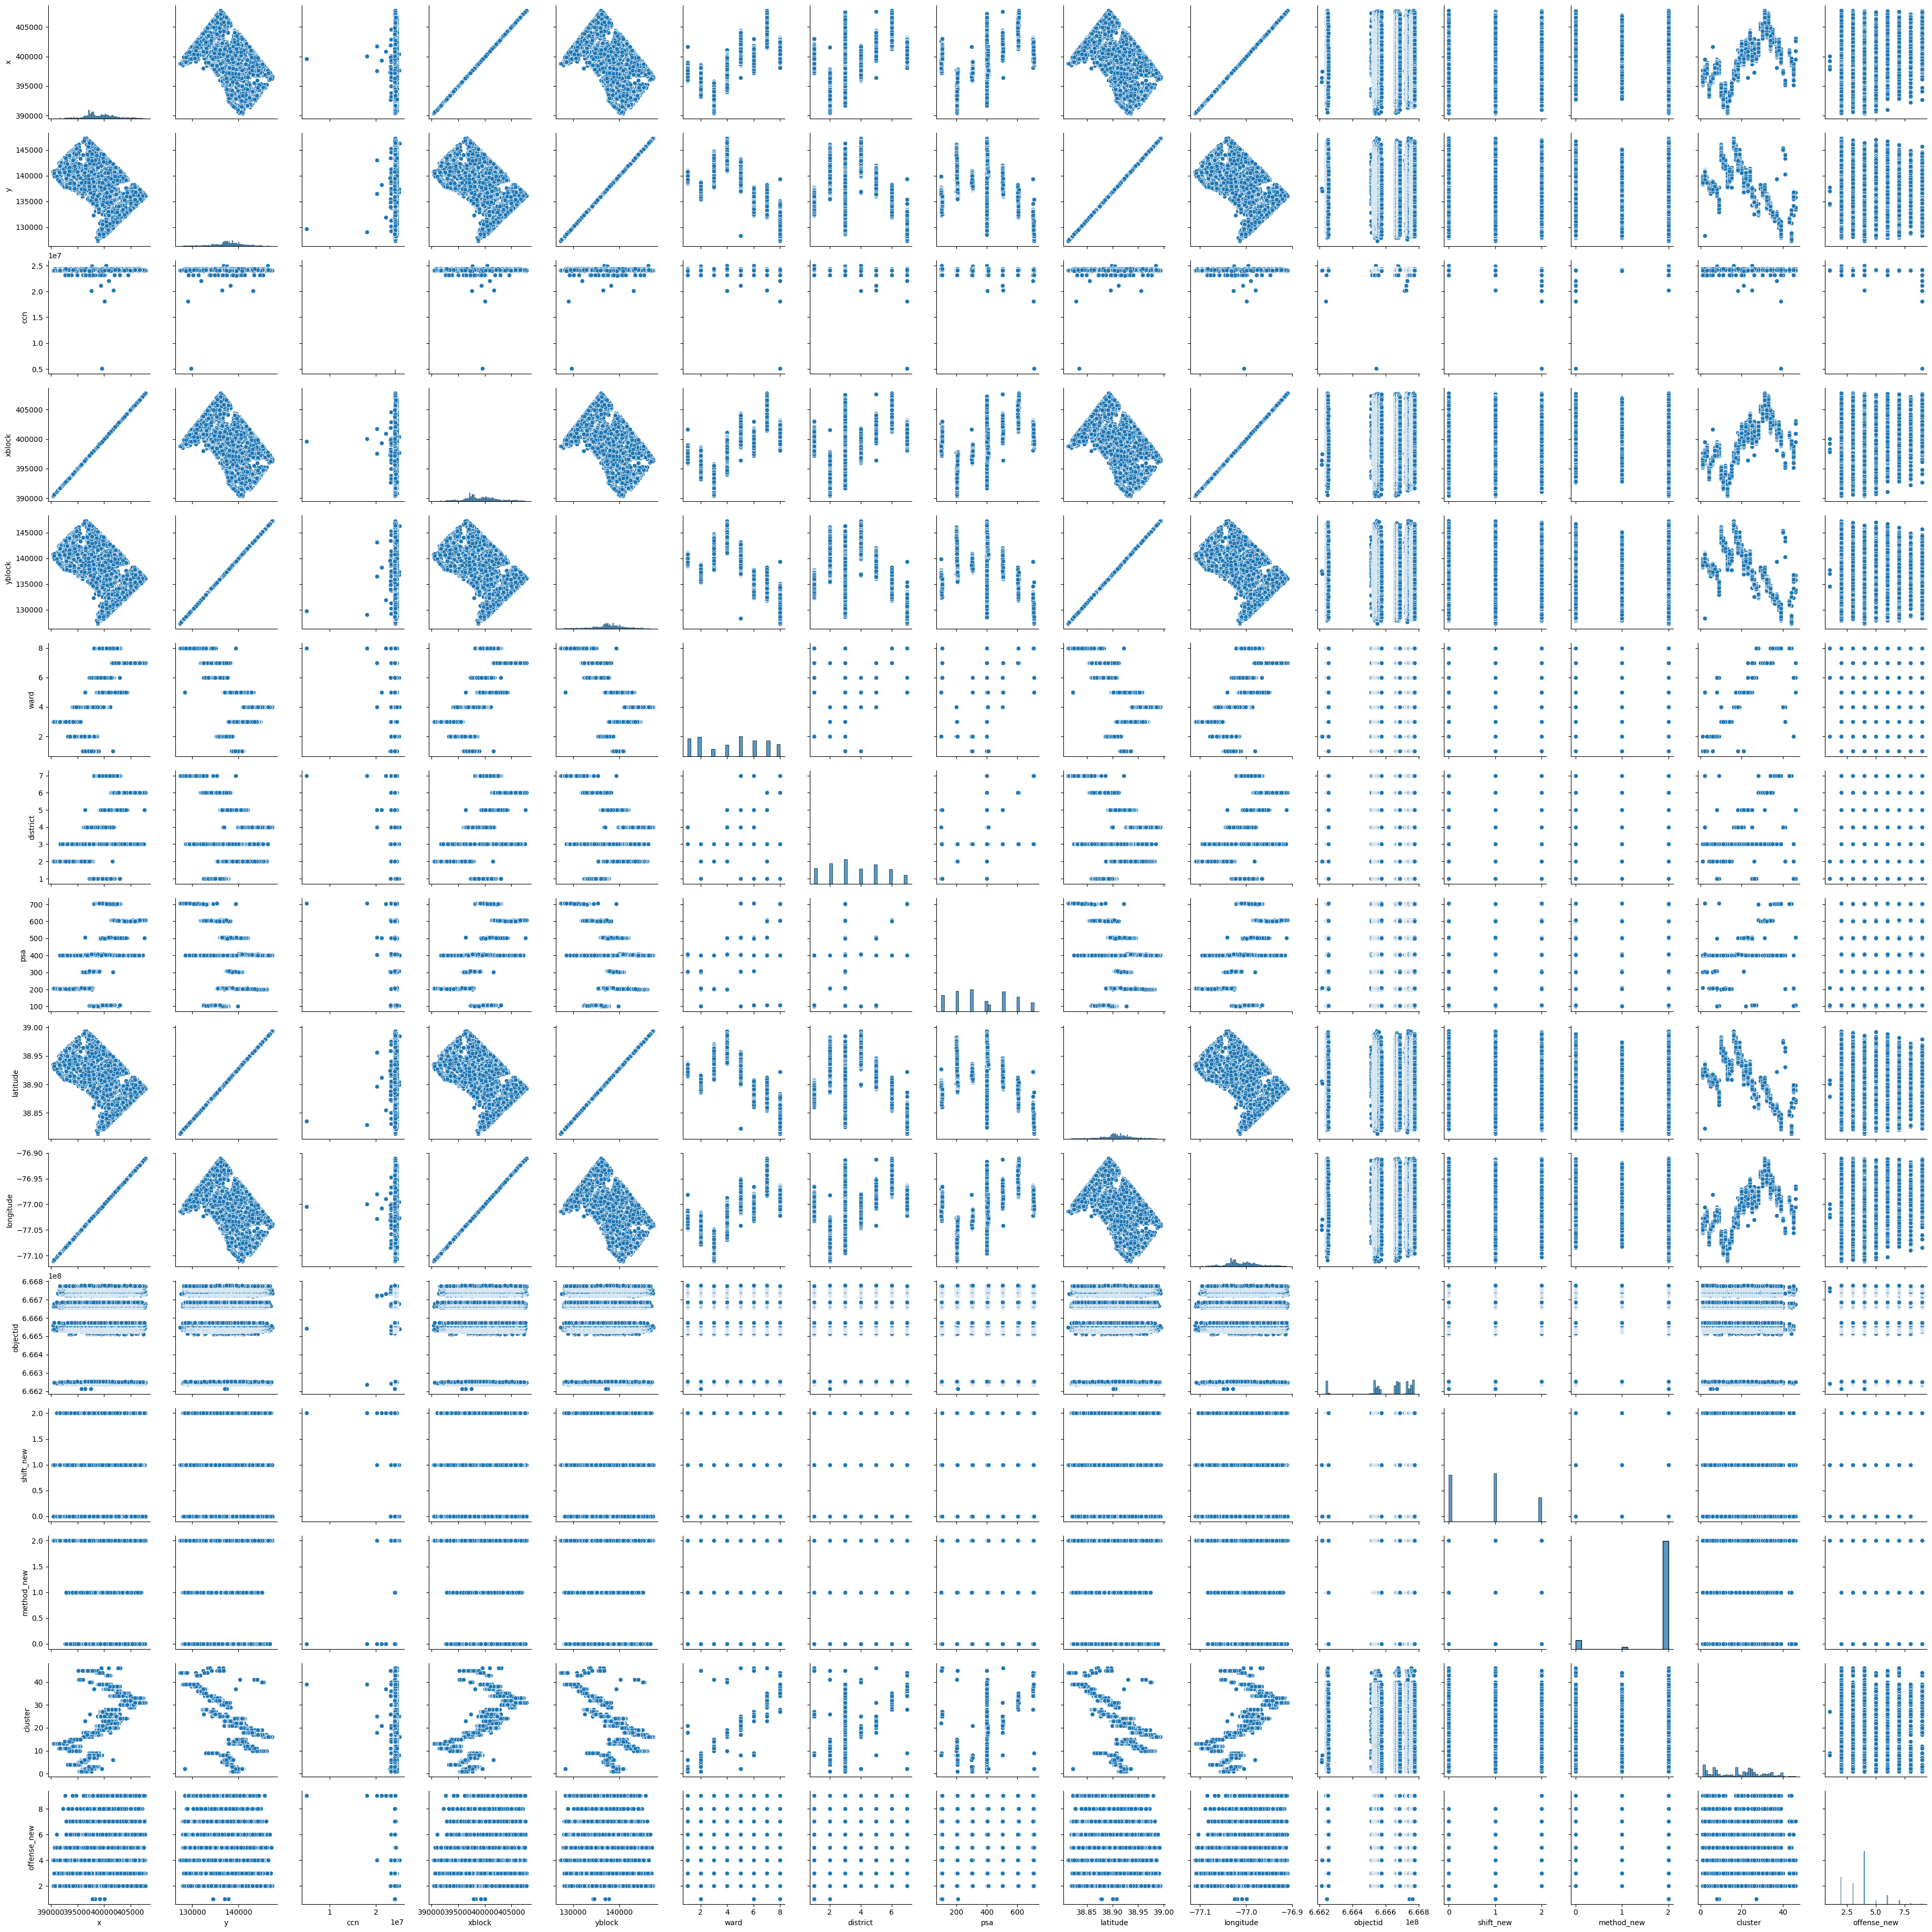

In [48]:
sns.pairplot(df)

<Axes: xlabel='offense_new', ylabel='count'>

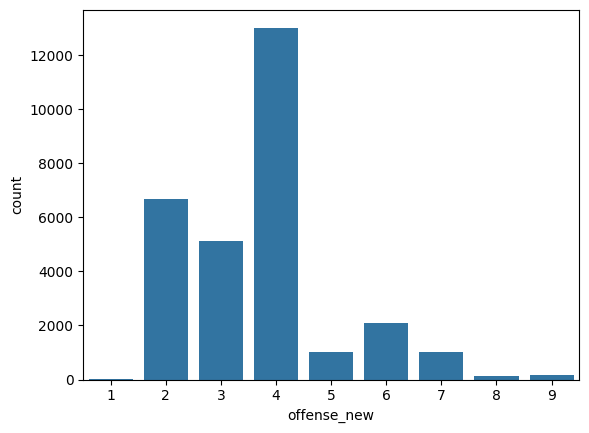

In [49]:
sns.countplot(x='offense_new',data=df)